In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from math import ceil
import macti.visual

Obtención de los datos

In [15]:
TFR = pd.read_csv('UNdata_Export_20230621_205538168.zip')
# GPD per capita
GDP = pd.read_csv('UNdata_Export_20230624_011417717.zip')
# Life expectancy at birth 
LEB = pd.read_csv('UNdata_Export_20230624_013747471.zip')
# Gross enrolment ratio. Tertiary education
EDU = pd.read_csv('UNdata_Export_20230624_014454110.zip')

In [54]:
print(TFR.columns)
print(GDP.columns)
print(LEB.columns)
print(EDU.columns)

Index(['Country or Area', 'Year(s)', 'Variant', 'Value'], dtype='object')
Index(['Country or Area', 'Year', 'Item', 'Value'], dtype='object')
Index(['Country or Area', 'Year(s)', 'Variant', 'Value'], dtype='object')
Index(['Reference Area', 'Time Period', 'Sex', 'Age group',
       'Units of measurement', 'Observation Value'],
      dtype='object')


In [21]:
TFR_group = TFR.groupby('Country or Area')
GDP_group = GDP.groupby('Country or Area')
LEB_group = LEB.groupby('Country or Area')
EDU_group = EDU.groupby('Reference Area')

In [29]:
TFR_countries = TFR_group.groups.keys()
GDP_countries = GDP_group.groups.keys()
LEB_countries = LEB_group.groups.keys()
EDU_countries = EDU_group.groups.keys()

In [36]:
print(len(TFR_countries))
print(len(GDP_countries))
print(len(LEB_countries))
print(len(EDU_countries))

284
220
284
220


In [31]:
filtra_GDP = lambda p: p in GDP_countries
filtra_LEB = lambda p: p in LEB_countries
filtra_EDU = lambda p: p in EDU_countries

In [47]:
countries = list(filter(filtra_EDU, list(filter(filtra_GDP, list(filter(filtra_LEB, TFR_countries))))))

In [52]:
print(countries)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Ital

In [167]:
years = list(TFR_group.get_group('Afghanistan')['Year(s)'])
print(years)

[2101, 2100, 2099, 2098, 2097, 2096, 2095, 2094, 2093, 2092, 2091, 2090, 2089, 2088, 2087, 2086, 2085, 2084, 2083, 2082, 2081, 2080, 2079, 2078, 2077, 2076, 2075, 2074, 2073, 2072, 2071, 2070, 2069, 2068, 2067, 2066, 2065, 2064, 2063, 2062, 2061, 2060, 2059, 2058, 2057, 2056, 2055, 2054, 2053, 2052, 2051, 2050, 2049, 2048, 2047, 2046, 2045, 2044, 2043, 2042, 2041, 2040, 2039, 2038, 2037, 2036, 2035, 2034, 2033, 2032, 2031, 2030, 2029, 2028, 2027, 2026, 2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950]


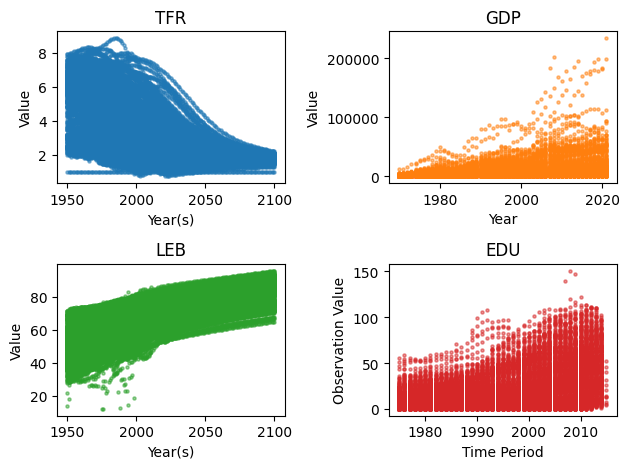

In [171]:
ax1 = plt.subplot(221)
TFR.plot(x='Year(s)', y='Value', kind='scatter', marker='.', fc='C0', alpha=0.5, ax=ax1)
ax1.set_title('TFR')

ax2 = plt.subplot(222)
GDP.plot(x='Year', y='Value', kind='scatter', marker='.', fc='C1', alpha=0.5, ax=ax2)
ax2.set_title('GDP')

ax3 = plt.subplot(223)
LEB.plot(x='Year(s)', y='Value', kind='scatter', marker='.', fc='C2', alpha=0.5, ax=ax3)
ax3.set_title('LEB')

ax4 = plt.subplot(224)
EDU.plot(x='Time Period', y='Observation Value', kind='scatter', marker='.', fc='C3', alpha=0.5, ax=ax4)
ax4.set_title('EDU')

plt.tight_layout()
plt.savefig('TFR_01.png', dpi=200)
plt.show()

In [196]:
from math import ceil

def maxmin_ticks(data, time, value, country):
    """
    Calcula el máximo y el mínimo de todos los países y los yticks.
    
    Parameters
    ----------
    paises : DataFrameGroupBy
        Dataframe generado por GroupBy con la información de los países.
        
    Returns
    -------
    p_max, y_max, p_min, y_min, yticks
        El país con el máximo valor, el valor máximo, la lista para los yticks,
        el país con el valor mínimo y el valor mínimo.
    """    
    # Se obtiene el valor máximo del time
    x_max = data[time].max()
    x_min = data[time].min()
    
    # Se obtiene el valor máximo del value
    y_max = data[value].max() 

    # Extrae el nombre del país con el valor máximo
    p_max = data[data[value] == y_max].iloc[0][country]

    # Se obtiene el valor mínimo
    y_min = data[value].min() 

    # Extrae el nombre del país con el valor mínimo
    p_min = data[data[value] == y_min].iloc[0][country]

    # Se generan los yticks
    yticks = [i for i in range(0,ceil(y_max)+1)]

    return p_max, y_max, p_min, y_min, yticks, x_min, x_max

def set_canvas(data, time, value, country, figsize, xstep=10):
    p_max, y_max, p_min, y_min, yticks, x_min, x_max = maxmin_ticks(data, time, value, country)
    print('Máximo = {}, \t País : {}'.format(y_max, p_max))
    print('Mínimo = {}, \t País : {}'.format(y_min, p_min))
    print(yticks)
    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    
    if not data.empty:
        data.plot(x='Year(s)', y='Value', color='lightgray', rot = 70, xlabel='', lw = 0.5, ax = ax, label='', legend=False)
        
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_ylim(y_min,y_max)
    ax.set_yticks(yticks)
    ax.set_xticks([a for a in range(x_min, x_max+1, xstep)])
    ax.grid(lw=0.5, color='gainsboro')

    return fig, ax

def plot_country(ax, country, color, maxim = 2021, label=''):    
#    if extra:
    x = country['Year(s)'][country['Year(s)']>=maxim-1]
    y = country['Value'][country['Year(s)']>=maxim-1]
    ax.plot(x, y, c=color, ls = '--', lw = 0.75)
#    else:
    x = country['Year(s)'][country['Year(s)']<maxim]
    y = country['Value'][country['Year(s)']<maxim]
    ax.plot(x, y, c=color, ls = '-', lw = 2.0, label=label)
        

In [197]:
TFR_group.get_group('Yemen').dropna()

,Country or Area,Year(s),Variant,Value
43017,Yemen,2100,Medium,1.8205
43018,Yemen,2099,Medium,1.8224
43019,Yemen,2098,Medium,1.8230
43020,Yemen,2097,Medium,1.8345
43021,Yemen,2096,Medium,1.8387
...,...,...,...,...
43163,Yemen,1954,Medium,7.8979
43164,Yemen,1953,Medium,7.8988
43165,Yemen,1952,Medium,7.8836
43166,Yemen,1951,Medium,7.8959


Máximo = 8.8637, 	 País : Yemen
Mínimo = 0.7455, 	 País : China, Hong Kong SAR
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


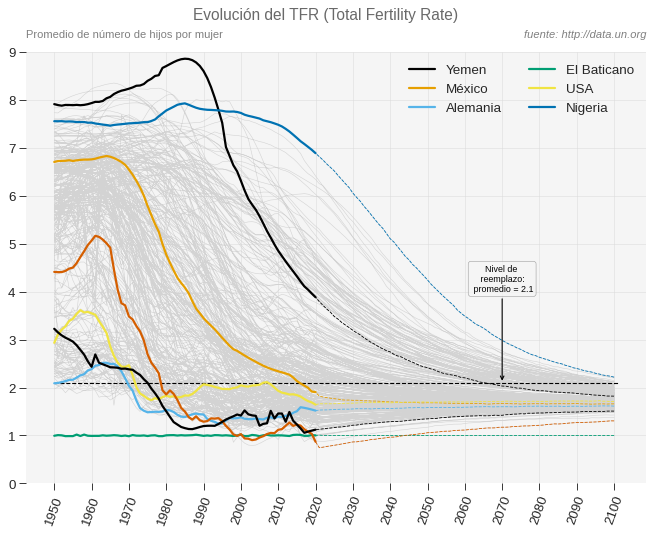

In [244]:
fig, ax = set_canvas(TFR, 'Year(s)', 'Value', 'Country or Area', (10,7))

ax.plot([years[-1], years[0]],[2.1,2.1], 'k--', lw=1.0) 
ax.set_title('Promedio de número de hijos por mujer', loc='left', color='gray', fontsize=10)
ax.set_title('fuente: http://data.un.org', loc='right', color='gray', fontstyle='italic', fontsize=10)
plt.suptitle('Evolución del TFR (Total Fertility Rate)', y = 0.96, color='dimgray', fontsize=14)
ax.annotate('Nivel de \n reemplazo: \n promedio = 2.1', 
             xy=(2070, 2.095), xytext=(2070, 4.0),
             bbox=dict(boxstyle='round', facecolor='whitesmoke', edgecolor='gray', alpha=0.75, linewidth=0.5),
             arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
             fontsize=8, color='black', horizontalalignment='center')

plot_country(ax, TFR_group.get_group('Yemen').dropna(), color='C0', label='Yemen')
plot_country(ax, TFR_group.get_group('Mexico').dropna(), color='C1', label='México')
plot_country(ax, TFR_group.get_group('Germany').dropna(), color='C2', label='Alemania')
plot_country(ax, TFR_group.get_group('Holy See').dropna(), color='C3', label='El Baticano')
plot_country(ax, TFR_group.get_group('United States of America').dropna(), color='C4', label='USA')
plot_country(ax, TFR_group.get_group('Niger').dropna(), color='C5', label='Nigeria')
plot_country(ax, TFR_group.get_group('China, Hong Kong SAR').dropna(), color='C6')
plot_country(ax, TFR_group.get_group('San Marino').dropna(), color='C8')


plt.legend(ncol=2)
plt.savefig('TFR.png', dpi=120)
plt.show()

In [ ]:
min_global = min(TFR[TFR['Year(s)'] == 1985]['Value'])
min_global
TFR[TFR['Year(s)'] == 1985][TFR['Value'] == min_global]

In [ ]:
TFR[TFR['Year(s)'] == 1985][TFR['Value'] < 1.5]

In [ ]:
paises_TFR = TFR.groupby('Country or Area')

In [ ]:
paises_TFR.groups.keys()

In [ ]:
years = list(paises_TFR.get_group('Afghanistan')['Year(s)'])

In [ ]:
def get_country_values(pais, maxim = 2021, extra = False):
    if extra:
        return pais['Year(s)'][pais['Year(s)']>=maxim-1], pais['Value'][pais['Year(s)']>=maxim-1], '--', 0.75
    else:
        return pais['Year(s)'][pais['Year(s)']<maxim], pais['Value'][pais['Year(s)']<maxim], '-', 2.0

In [ ]:
def plot_country(ax, country, color, maxim = 2021, extra=False):
    x, y, ls, lw = get_country_values(country, maxim, extra)
    ax.plot(x, y, c=color, ls = ls, lw = lw)

def set_canvas(xmin, xmax, xstep, ymin, ymax, yticks, data = None):
    fig = plt.figure(figsize=(16,8))
    ax = plt.gca()
    
    if not data.empty:
        data.plot(x='Year(s)', y='Value', color='silver', rot = 70, xlabel='', lw = 0.5, ax = ax, legend=False)
        
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_ylim(ymin,ymax)
    ax.set_yticks(yticks)
    ax.set_xticks([a for a in range(xmin,xmax,xstep)])

    return fig, ax

def decora(fig, ax):
    ax.plot([years[-1], years[0]],[2.1,2.1], 'k--', lw=1.0) 
    plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
    plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
    plt.suptitle('Evolución del TFR (Total Fertility Rate)', y = 0.94, fontsize=14)
    plt.annotate('Nivel de \n reemplazo: \n promedio = 2.1', 
             xy=(2070, 2.095), xytext=(2070, 4.0),
             bbox=dict(boxstyle='round', facecolor='silver', edgecolor='gray', alpha=0.75, linewidth=0.5),
             arrowprops=dict(arrowstyle='->', facecolor='black', edgecolor='black'),
             fontsize=8, color='black', horizontalalignment='center')

In [ ]:
p_max, y_max, p_min, y_min, yticks = maxminTicks(TFR)
print('Máximo = {}, \t País : {}'.format(y_max, p_max))
print('Mínimo = {}, \t País : {}'.format(y_min, p_min))
print('yticks : {}'.format(yticks))

In [ ]:
yemen = paises_TFR.get_group('Yemen')
china_HK_SAR = paises_TFR.get_group('China, Hong Kong SAR')
mexico = paises_TFR.get_group('Mexico')
baticano = paises_TFR.get_group('Holy See')
luxemburgo = paises_TFR.get_group('Luxembourg')
alemania = paises_TFR.get_group('Germany')
austria = paises_TFR.get_group('Austria')
latvia = paises_TFR.get_group('Latvia')
china_MC_SAR = paises_TFR.get_group('China, Macao SAR')
san_marino = paises_TFR.get_group('San Marino')
suiza = paises_TFR.get_group('Switzerland')
noruega = paises_TFR.get_group('Norway')
belice = paises_TFR.get_group('Belize')
kenia = paises_TFR.get_group('Kenya')

In [ ]:
fig, ax = set_canvas(1950, 2100, 10, y_min, y_max, yticks, TFR)
decora(fig, ax)

plot_country(ax, yemen, color='C0')
#plot_country(ax, china_HK_SAR, color='C1')
plot_country(ax, mexico, color='C2')
plot_country(ax, mexico, color='C2', extra=True)
plot_country(ax, baticano, color='C3')
#plot_country(ax, luxemburgo, color='C4')
plot_country(ax, alemania, color='C5')
plot_country(ax, latvia, color='C6')
plot_country(ax, china_MC_SAR, color='C7')
#plot_country(ax, san_marino, color='C8')
plot_country(ax, noruega, color='C8')
plot_country(ax, suiza, color='C9')
plot_country(ax, belice, color='C9')
plot_country(ax, kenia, color='C9')

ax.grid(True)
plt.legend()
plt.show()

In [5]:
# GPD per capita
GDP = pd.read_csv('UNdata_Export_20230624_011417717.zip')

In [6]:
GDP

,Country or Area,Year,Item,Value
0,Afghanistan,2021,Gross National Income (GNI),376.929561
1,Afghanistan,2020,Gross National Income (GNI),521.714661
2,Afghanistan,2019,Gross National Income (GNI),508.479473
3,Afghanistan,2018,Gross National Income (GNI),507.274155
4,Afghanistan,2017,Gross National Income (GNI),537.126294
...,...,...,...,...
10501,Zimbabwe,1974,Gross National Income (GNI),818.486617
10502,Zimbabwe,1973,Gross National Income (GNI),700.319626
10503,Zimbabwe,1972,Gross National Income (GNI),588.156471
10504,Zimbabwe,1971,Gross National Income (GNI),491.583545


In [ ]:
paises_GDP = GDP.groupby('Country or Area')

In [ ]:
p_max, y_max, p_min, y_min, yticks = maxminTicks(GDP)
print('Máximo = {}, \t País : {}'.format(y_max, p_max))
print('Mínimo = {}, \t País : {}'.format(y_min, p_min))
yticks = [i for i in range(0,ceil(y_max)+1, 10000)]

print('yticks : {}'.format(yticks))

In [ ]:
liberia = paises_GDP.get_group('Liberia')
qatar = paises_GDP.get_group('Qatar')
mexico = paises_GDP.get_group('Mexico')
yemen = paises_GDP.get_group('Yemen')

In [ ]:
fig, ax = set_canvas(1980, 2012, 5, y_min, y_max, yticks, GDP)

plot_country(ax, liberia, color='C0')
plot_country(ax, mexico, color='C2')
plot_country(ax, qatar, color='C3')
plot_country(ax, yemen, color='C3')

ax.grid(True)
plt.legend()
plt.show()

In [8]:
# Life expectancy at birth 
LEB = pd.read_csv('UNdata_Export_20230624_013747471.zip')
LEB

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2101,Medium,NaN
1,Afghanistan,2100,Medium,77.5384
2,Afghanistan,2099,Medium,77.3909
3,Afghanistan,2098,Medium,77.2354
4,Afghanistan,2097,Medium,77.0851
...,...,...,...,...
43467,Zimbabwe,1954,Medium,51.0120
43468,Zimbabwe,1953,Medium,50.6165
43469,Zimbabwe,1952,Medium,50.2169
43470,Zimbabwe,1951,Medium,49.8599
